<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_Viral_python_100000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

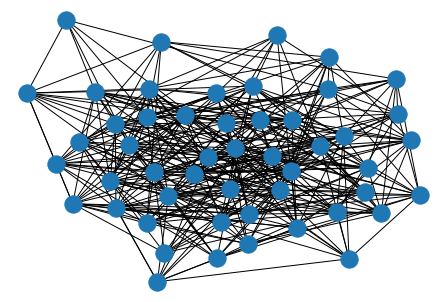

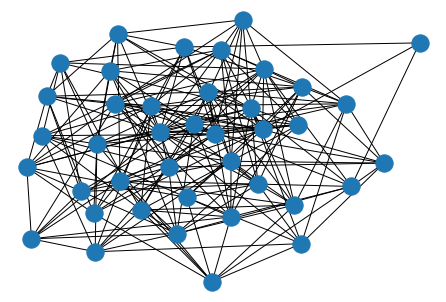

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 100000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 1 1 0]
 [0 0 1 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:                       
                      #PN=min(Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I'],Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I'],Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I'])/min(Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I']**2+N,Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+N,Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+N)
                      PNN2 = .1*(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      PNN3 = .1*(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      PNN1 = 1 - PNN2 - PNN3
                      next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      
                      #PN1 = min(Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I'],Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I'],Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I'])/min(Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I']**2+N,Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+N,Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+N)
                      #PN1 = PN1/3
                      #P1 = 1-PN1
                      PNN2 = .3*(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      PNN3 = .3*(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      PNN1 = 1 - PNN2 - PNN3
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] <= .0625:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514]
[2025, 4344, 9079, 17793, 29734, 44825, 57385, 62385, 57206, 44865, 30283, 17929, 9842, 5085, 2524, 1264, 610, 326, 189, 97, 59, 36, 22, 15, 8, 3, 3, 3, 2, 2, 1, 0]
[0, 0, 0, 0, 2025, 4344, 9079, 17793, 31759, 49169, 66464, 80178, 88965, 94034, 96747, 98107, 98807, 99119, 99271, 99371, 99417, 99445, 99460, 99468, 99476, 99481, 99482, 99483, 99484, 99484, 99485, 99486]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514]]
[[], [2025, 4344, 9079, 17793, 29734, 44825, 57385, 62385, 57206, 44865, 30283, 17929, 9842, 5085, 2524, 1264, 610, 326, 189, 97, 59, 36, 22, 15, 8, 3, 3, 3, 2, 2, 1, 0]]
[[], [0, 0, 0, 0, 2025, 4344, 9079, 17793, 31759, 49169, 66464, 80178, 88965, 94034, 9

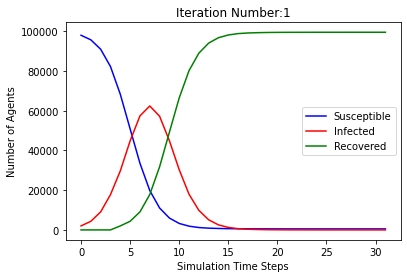

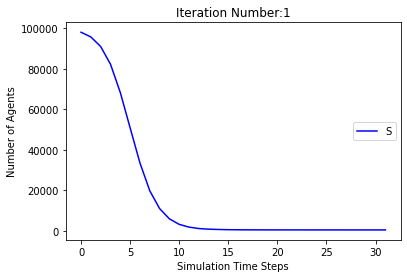

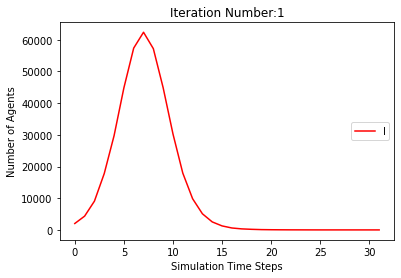

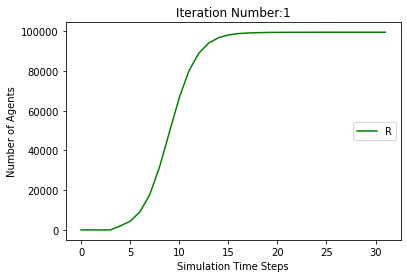

[97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570]
[2025, 4409, 9218, 18075, 29756, 44431, 56343, 60776, 56081, 44384, 30652, 18908, 10714, 5768, 2985, 1545, 791, 405, 217, 114, 56, 27, 12, 9, 5, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 2025, 4409, 9218, 18075, 31781, 48840, 65561, 78851, 87862, 93224, 96213, 97759, 98576, 98992, 99198, 99304, 99367, 99397, 99415, 99418, 99423, 99424, 99427, 99427, 99428, 99428, 99428, 99428, 99429, 99429, 99429, 99430]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 5

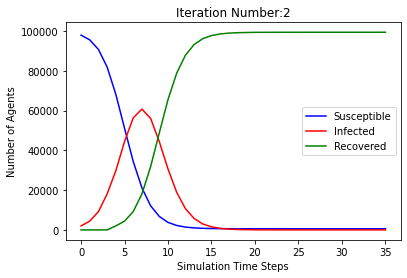

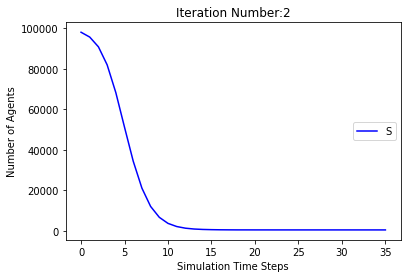

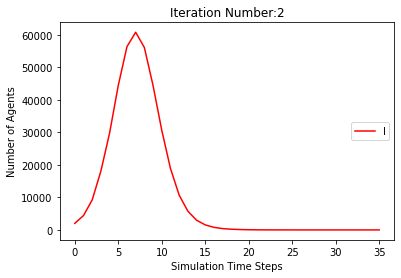

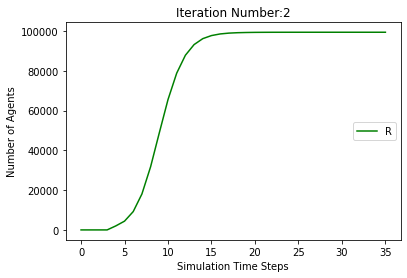

[97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089, 2498, 1315, 812, 595, 503, 454, 422, 412, 409, 407, 403, 403, 403, 402, 402, 402, 402, 402]
[2025, 4374, 8999, 17746, 29944, 44943, 57822, 63232, 57957, 45594, 30681, 17707, 9262, 4494, 1995, 861, 390, 183, 94, 47, 19, 9, 6, 5, 1, 1, 1, 0]
[0, 0, 0, 0, 2025, 4374, 8999, 17746, 31969, 49317, 66821, 80978, 89926, 94911, 97502, 98685, 99188, 99405, 99497, 99546, 99578, 99588, 99591, 99593, 99597, 99597, 99597, 99598]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089, 2498, 1315, 812, 595, 503, 454, 422, 412, 409, 4

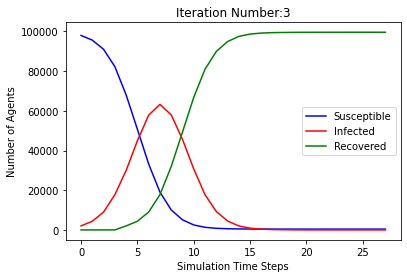

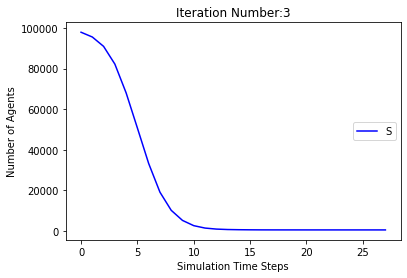

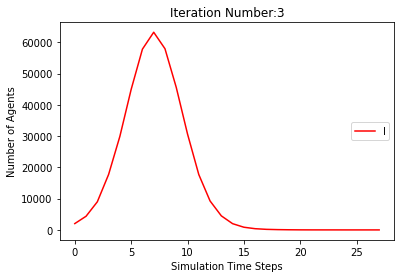

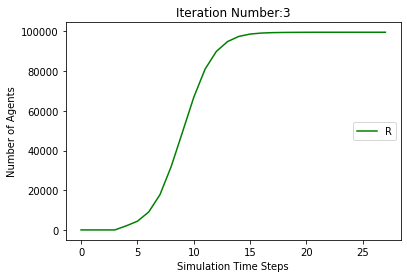

[97975, 95586, 90608, 81304, 66352, 47999, 30023, 16815, 8762, 4488, 2265, 1272, 827, 592, 480, 429, 417, 404, 400, 397, 397, 397, 397, 397]
[2025, 4414, 9392, 18696, 31623, 47587, 60585, 64489, 57590, 43511, 27758, 15543, 7935, 3896, 1785, 843, 410, 188, 80, 32, 20, 7, 3, 0]
[0, 0, 0, 0, 2025, 4414, 9392, 18696, 33648, 52001, 69977, 83185, 91238, 95512, 97735, 98728, 99173, 99408, 99520, 99571, 99583, 99596, 99600, 99603]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089, 2498, 1315, 812, 595, 503, 454, 422, 412, 409, 407, 403, 403, 403, 402, 402, 402, 402, 402], [97975, 95586, 9

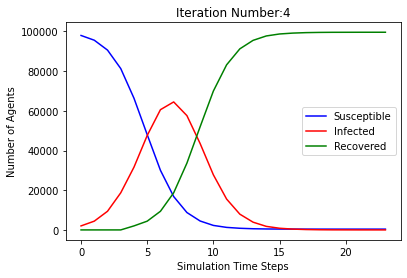

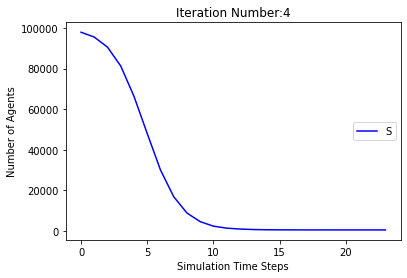

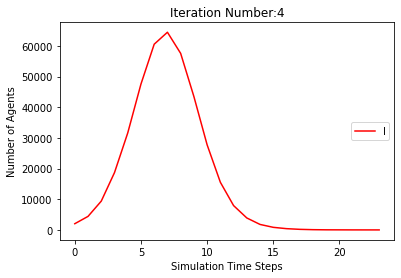

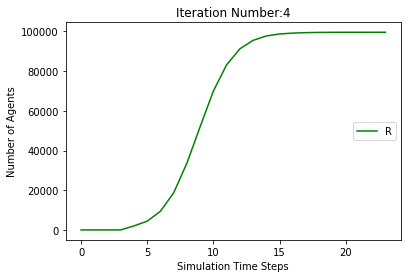

[97975, 95597, 90687, 81447, 66725, 48437, 30583, 17083, 8735, 4447, 2336, 1344, 879, 644, 537, 466, 428, 406, 396, 391, 389, 389, 389, 388, 388, 388, 388, 388]
[2025, 4403, 9313, 18553, 31250, 47160, 60104, 64364, 57990, 43990, 28247, 15739, 7856, 3803, 1799, 878, 451, 238, 141, 75, 39, 17, 7, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 2025, 4403, 9313, 18553, 33275, 51563, 69417, 82917, 91265, 95553, 97664, 98656, 99121, 99356, 99463, 99534, 99572, 99594, 99604, 99609, 99611, 99611, 99611, 99612]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089, 2498, 1315, 812, 595, 503, 454, 422, 412, 409, 

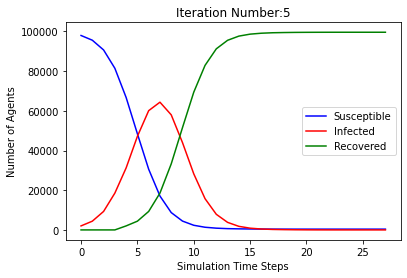

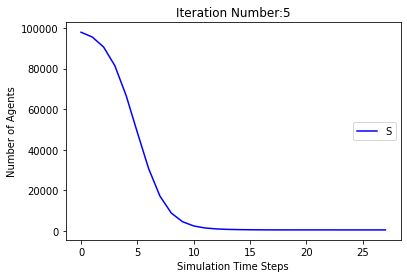

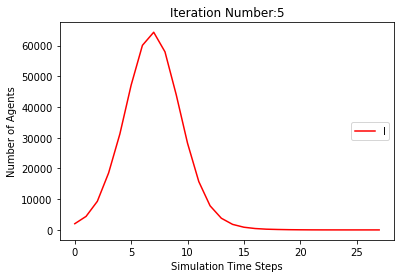

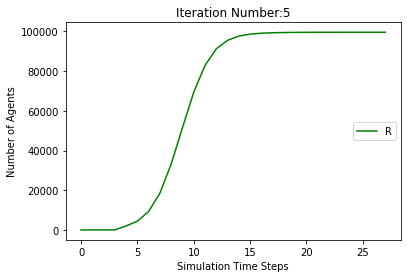

[97975, 95551, 90587, 81480, 67153, 49863, 32982, 19660, 10999, 6086, 3251, 1875, 1182, 847, 701, 623, 573, 555, 549, 544, 543, 541, 540, 538, 537, 537, 536, 536, 536, 536, 536]
[2025, 4449, 9413, 18520, 30822, 45688, 57605, 61820, 56154, 43777, 29731, 17785, 9817, 5239, 2550, 1252, 609, 292, 152, 79, 30, 14, 9, 6, 6, 4, 4, 2, 1, 1, 0]
[0, 0, 0, 0, 2025, 4449, 9413, 18520, 32847, 50137, 67018, 80340, 89001, 93914, 96749, 98125, 98818, 99153, 99299, 99377, 99427, 99445, 99451, 99456, 99457, 99459, 99460, 99462, 99463, 99463, 99464]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089,

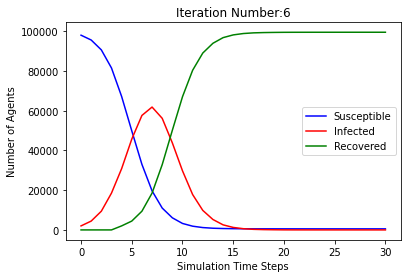

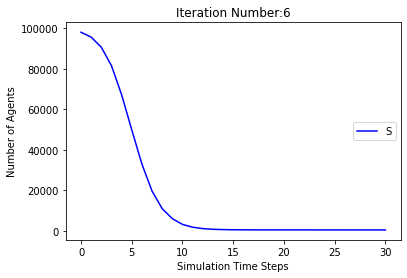

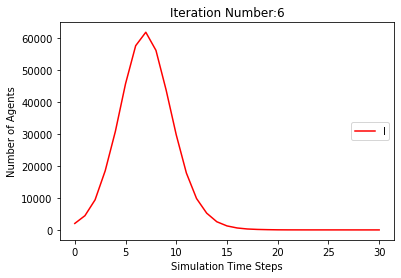

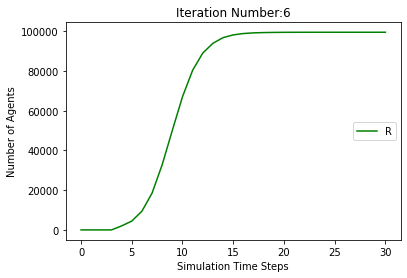

[97975, 95716, 91068, 82478, 68521, 50868, 33276, 19507, 10774, 5797, 3135, 1800, 1162, 822, 662, 573, 512, 496, 486, 476, 473, 470, 468, 466, 463, 463, 463, 463, 463]
[2025, 4284, 8932, 17522, 29454, 44848, 57792, 62971, 57747, 45071, 30141, 17707, 9612, 4975, 2473, 1227, 650, 326, 176, 97, 39, 26, 18, 10, 10, 7, 5, 3, 0]
[0, 0, 0, 0, 2025, 4284, 8932, 17522, 31479, 49132, 66724, 80493, 89226, 94203, 96865, 98200, 98838, 99178, 99338, 99427, 99488, 99504, 99514, 99524, 99527, 99530, 99532, 99534, 99537]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089, 2498, 1315, 812, 595, 503,

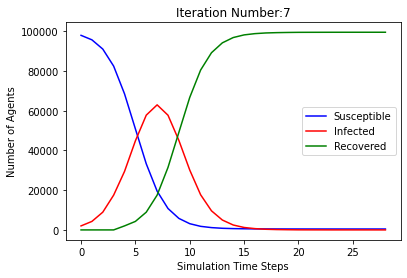

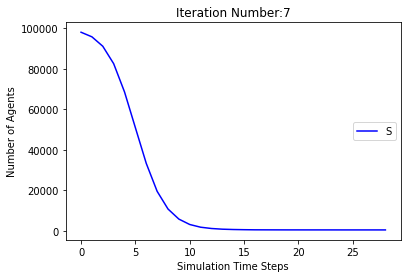

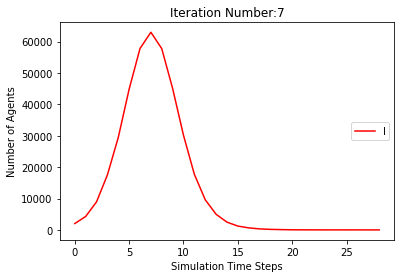

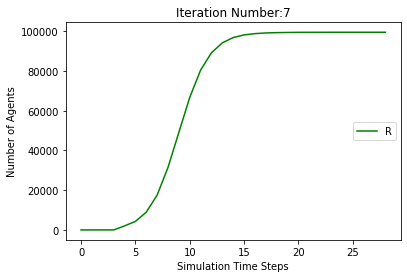

[97975, 95611, 90871, 82453, 68996, 52931, 36646, 22843, 13222, 7389, 3944, 2238, 1391, 996, 768, 650, 584, 560, 545, 537, 536, 534, 532, 530, 530, 530, 530, 530]
[2025, 4389, 9129, 17547, 28979, 42680, 54225, 59610, 55774, 45542, 32702, 20605, 11831, 6393, 3176, 1588, 807, 436, 223, 113, 48, 26, 13, 7, 6, 4, 2, 0]
[0, 0, 0, 0, 2025, 4389, 9129, 17547, 31004, 47069, 63354, 77157, 86778, 92611, 96056, 97762, 98609, 99004, 99232, 99350, 99416, 99440, 99455, 99463, 99464, 99466, 99468, 99470]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089, 2498, 1315, 812, 595, 503, 454, 422, 412,

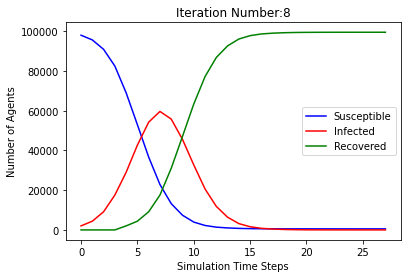

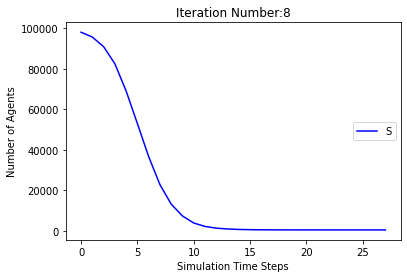

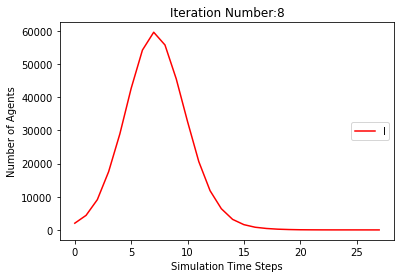

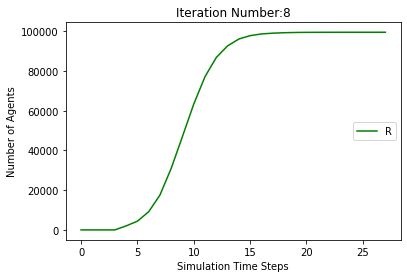

[97975, 95661, 90861, 82204, 68360, 51055, 33264, 19097, 10128, 5245, 2690, 1425, 855, 583, 463, 413, 395, 386, 383, 382, 382, 382, 382, 382]
[2025, 4339, 9139, 17796, 29615, 44606, 57597, 63107, 58232, 45810, 30574, 17672, 9273, 4662, 2227, 1012, 460, 197, 80, 31, 13, 4, 1, 0]
[0, 0, 0, 0, 2025, 4339, 9139, 17796, 31640, 48945, 66736, 80903, 89872, 94755, 97310, 98575, 99145, 99417, 99537, 99587, 99605, 99614, 99617, 99618]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089, 2498, 1315, 812, 595, 503, 454, 422, 412, 409, 407, 403, 403, 403, 402, 402, 402, 402, 402], [97975, 95586,

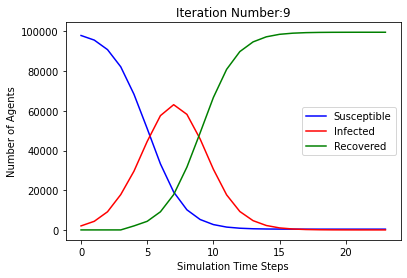

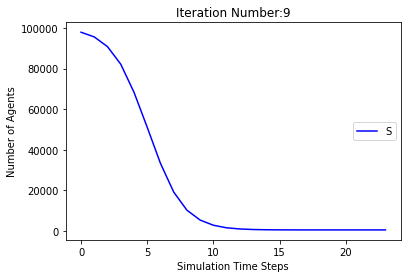

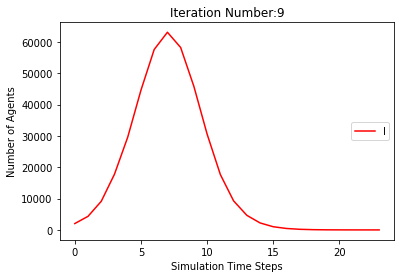

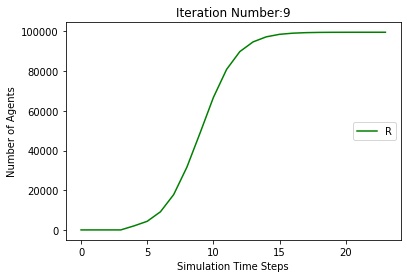

[97975, 95672, 90914, 82081, 67966, 50241, 32476, 18799, 10203, 5415, 2779, 1532, 964, 683, 567, 494, 463, 453, 445, 442, 440, 438, 436, 435, 435, 435, 435, 435]
[2025, 4328, 9086, 17919, 30009, 45431, 58438, 63282, 57763, 44826, 29697, 17267, 9239, 4732, 2212, 1038, 501, 230, 122, 52, 23, 15, 9, 7, 5, 3, 1, 0]
[0, 0, 0, 0, 2025, 4328, 9086, 17919, 32034, 49759, 67524, 81201, 89797, 94585, 97221, 98468, 99036, 99317, 99433, 99506, 99537, 99547, 99555, 99558, 99560, 99562, 99564, 99565]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089, 2498, 1315, 812, 595, 503, 454, 422, 412, 409

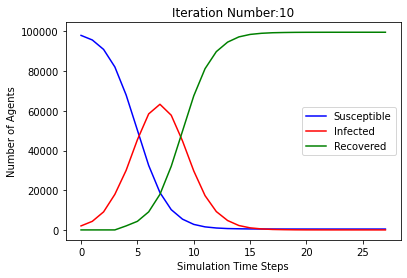

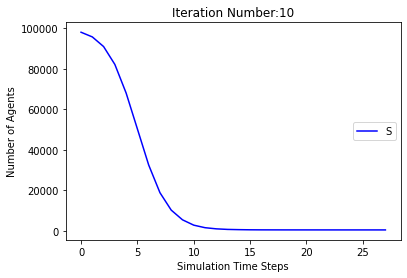

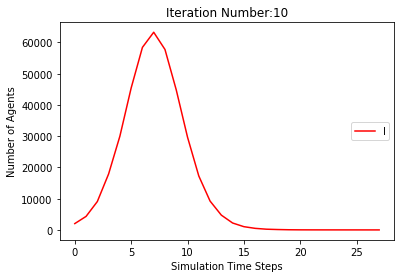

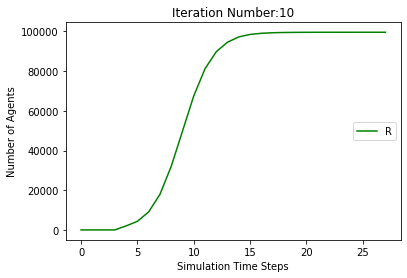

[97975, 95640, 90732, 81585, 67061, 48716, 30442, 16709, 8547, 4229, 2102, 1161, 755, 593, 496, 463, 435, 420, 415, 412, 409, 409, 409, 409, 409]
[2025, 4360, 9268, 18415, 30914, 46924, 60290, 64876, 58514, 44487, 28340, 15548, 7792, 3636, 1606, 698, 320, 173, 81, 51, 26, 11, 6, 3, 0]
[0, 0, 0, 0, 2025, 4360, 9268, 18415, 32939, 51284, 69558, 83291, 91453, 95771, 97898, 98839, 99245, 99407, 99504, 99537, 99565, 99580, 99585, 99588, 99591]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089, 2498, 1315, 812, 595, 503, 454, 422, 412, 409, 407, 403, 403, 403, 402, 402, 402, 402, 402], 

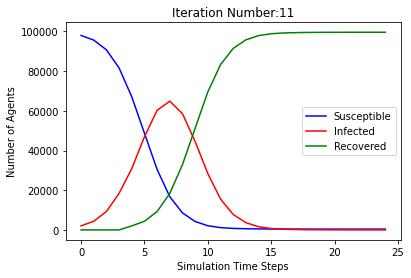

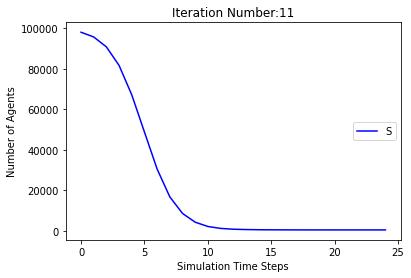

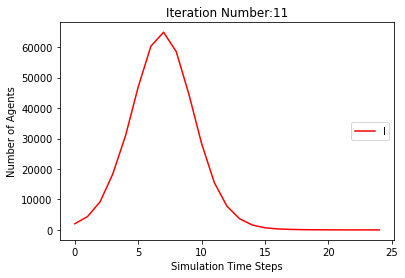

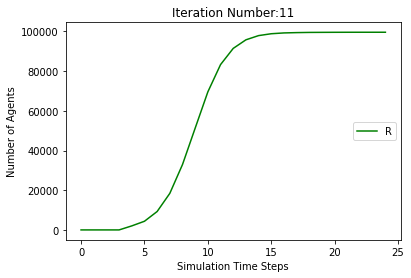

[97975, 95647, 90842, 81929, 67973, 50719, 33464, 19932, 10963, 5742, 2976, 1600, 994, 712, 581, 513, 488, 468, 463, 461, 461, 461, 461, 461]
[2025, 4353, 9158, 18071, 30002, 44928, 57378, 61997, 57010, 44977, 30488, 18332, 9969, 5030, 2395, 1087, 506, 244, 118, 52, 27, 7, 2, 0]
[0, 0, 0, 0, 2025, 4353, 9158, 18071, 32027, 49281, 66536, 80068, 89037, 94258, 97024, 98400, 99006, 99288, 99419, 99487, 99512, 99532, 99537, 99539]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089, 2498, 1315, 812, 595, 503, 454, 422, 412, 409, 407, 403, 403, 403, 402, 402, 402, 402, 402], [97975, 95586

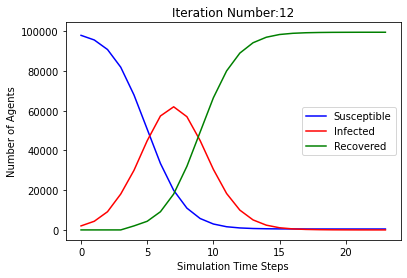

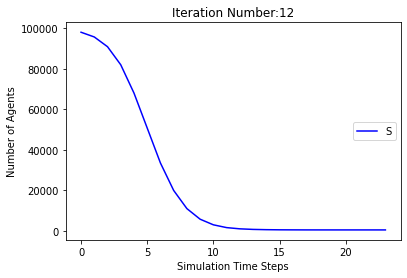

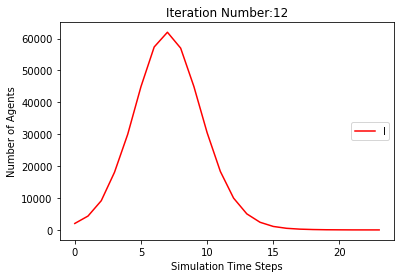

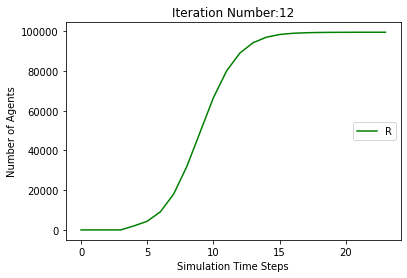

[97975, 95604, 90849, 82038, 68065, 51110, 33913, 20858, 12068, 6794, 3883, 2283, 1463, 1059, 835, 721, 663, 626, 606, 597, 593, 593, 590, 587, 586, 586, 585, 585, 585, 585, 585]
[2025, 4396, 9151, 17962, 29910, 44494, 56936, 61180, 55997, 44316, 30030, 18575, 10605, 5735, 3048, 1562, 800, 433, 229, 124, 70, 33, 16, 10, 7, 7, 5, 2, 1, 1, 0]
[0, 0, 0, 0, 2025, 4396, 9151, 17962, 31935, 48890, 66087, 79142, 87932, 93206, 96117, 97717, 98537, 98941, 99165, 99279, 99337, 99374, 99394, 99403, 99407, 99407, 99410, 99413, 99414, 99414, 99415]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 

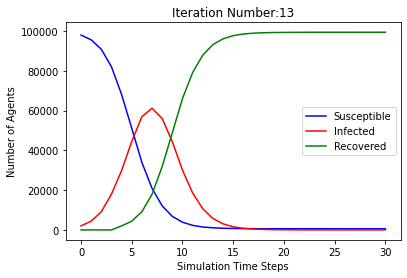

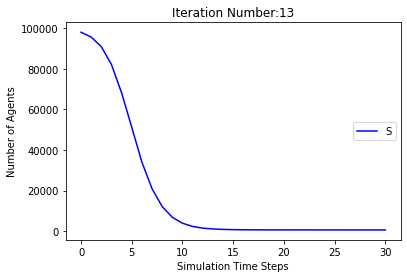

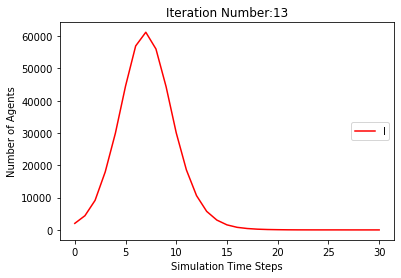

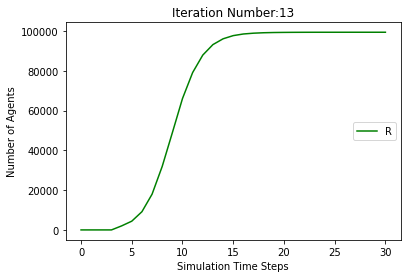

[97975, 95627, 90905, 82184, 68166, 51024, 34041, 20439, 11275, 6012, 3116, 1657, 993, 696, 566, 505, 469, 462, 454, 454, 453, 452, 452, 452, 452, 452]
[2025, 4373, 9095, 17816, 29809, 44603, 56864, 61745, 56891, 45012, 30925, 18782, 10282, 5316, 2550, 1152, 524, 234, 112, 51, 16, 10, 2, 2, 1, 0]
[0, 0, 0, 0, 2025, 4373, 9095, 17816, 31834, 48976, 65959, 79561, 88725, 93988, 96884, 98343, 99007, 99304, 99434, 99495, 99531, 99538, 99546, 99546, 99547, 99548]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089, 2498, 1315, 812, 595, 503, 454, 422, 412, 409, 407, 403, 403, 403, 402, 40

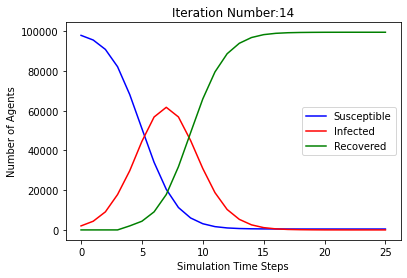

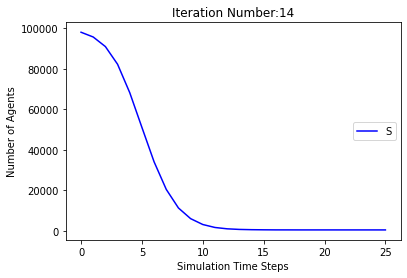

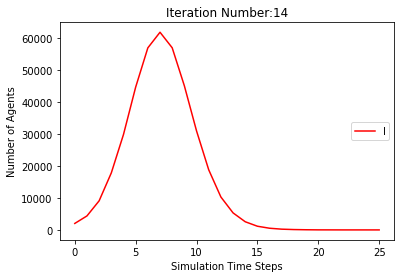

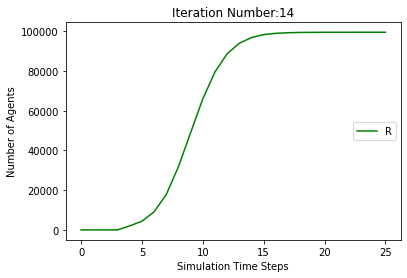

[97975, 95726, 91130, 82656, 68591, 51000, 33449, 19480, 10406, 5330, 2625, 1373, 827, 595, 497, 453, 429, 415, 412, 409, 409, 409, 407, 407, 407, 407, 407]
[2025, 4274, 8870, 17344, 29384, 44726, 57681, 63176, 58185, 45670, 30824, 18107, 9579, 4735, 2128, 920, 398, 180, 85, 44, 20, 6, 5, 2, 2, 2, 0]
[0, 0, 0, 0, 2025, 4274, 8870, 17344, 31409, 49000, 66551, 80520, 89594, 94670, 97375, 98627, 99173, 99405, 99503, 99547, 99571, 99585, 99588, 99591, 99591, 99591, 99593]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089, 2498, 1315, 812, 595, 503, 454, 422, 412, 409, 407, 403, 403, 4

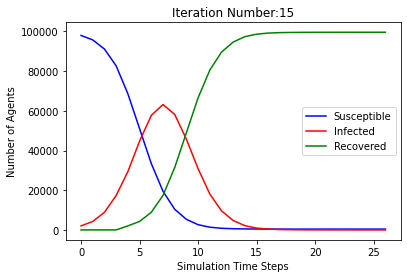

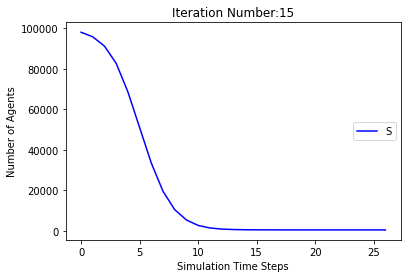

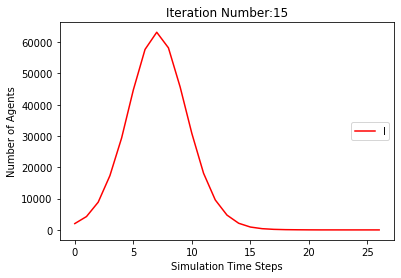

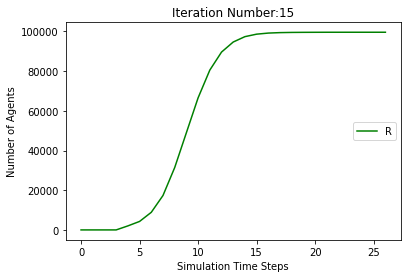

[97975, 95664, 90921, 82469, 69179, 53248, 37567, 24922, 15956, 10052, 6122, 3722, 2322, 1581, 1168, 949, 852, 799, 778, 761, 758, 755, 754, 753, 751, 750, 750, 750, 750, 750]
[2025, 4336, 9079, 17531, 28796, 42416, 53354, 57547, 53223, 43196, 31445, 21200, 13634, 8471, 4954, 2773, 1470, 782, 390, 188, 94, 44, 24, 8, 7, 5, 4, 3, 1, 0]
[0, 0, 0, 0, 2025, 4336, 9079, 17531, 30821, 46752, 62433, 75078, 84044, 89948, 93878, 96278, 97678, 98419, 98832, 99051, 99148, 99201, 99222, 99239, 99242, 99245, 99246, 99247, 99249, 99250]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089, 2498, 1

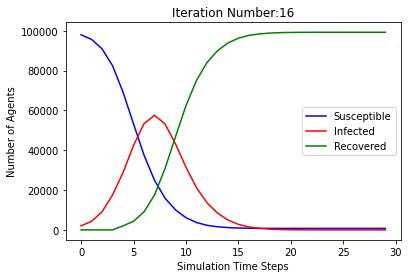

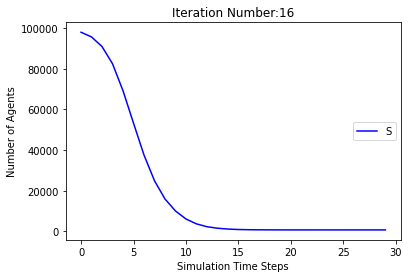

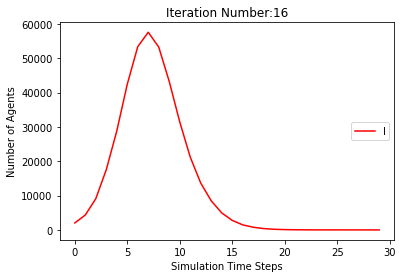

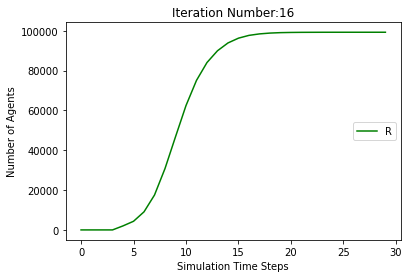

[97975, 95633, 90837, 82242, 68320, 51029, 33639, 20270, 11827, 6737, 3889, 2288, 1492, 1038, 807, 688, 639, 618, 606, 596, 589, 584, 581, 581, 580, 579, 579, 579, 578, 578, 578, 578, 578]
[2025, 4367, 9163, 17758, 29655, 44604, 57198, 61972, 56493, 44292, 29750, 17982, 10335, 5699, 3082, 1600, 853, 420, 201, 92, 50, 34, 25, 15, 9, 5, 2, 2, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 2025, 4367, 9163, 17758, 31680, 48971, 66361, 79730, 88173, 93263, 96111, 97712, 98508, 98962, 99193, 99312, 99361, 99382, 99394, 99404, 99411, 99416, 99419, 99419, 99420, 99421, 99421, 99421, 99422]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031,

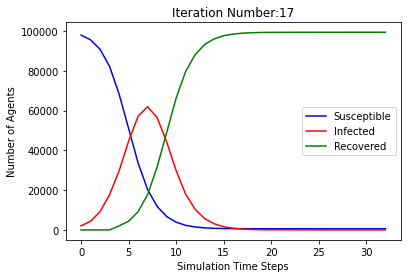

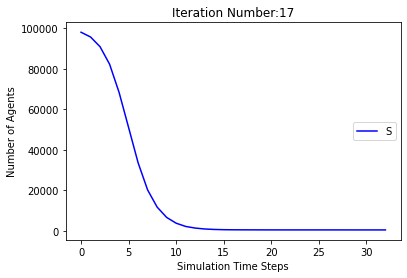

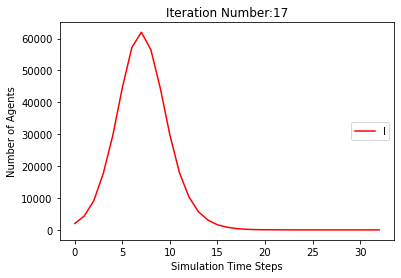

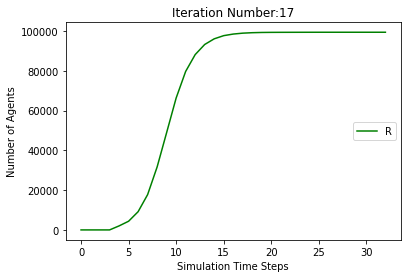

[97975, 95631, 90825, 82022, 67838, 49968, 32324, 18357, 9713, 4914, 2469, 1284, 791, 558, 456, 414, 380, 369, 358, 356, 354, 354, 354, 354, 354]
[2025, 4369, 9175, 17978, 30137, 45663, 58501, 63665, 58125, 45054, 29855, 17073, 8922, 4356, 2013, 870, 411, 189, 98, 58, 26, 15, 4, 2, 0]
[0, 0, 0, 0, 2025, 4369, 9175, 17978, 32162, 50032, 67676, 81643, 90287, 95086, 97531, 98716, 99209, 99442, 99544, 99586, 99620, 99631, 99642, 99644, 99646]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089, 2498, 1315, 812, 595, 503, 454, 422, 412, 409, 407, 403, 403, 403, 402, 402, 402, 402, 402], 

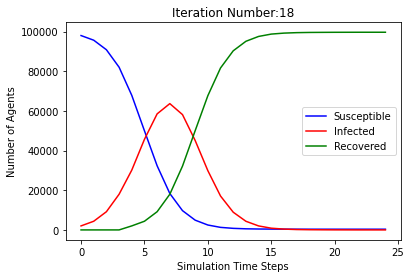

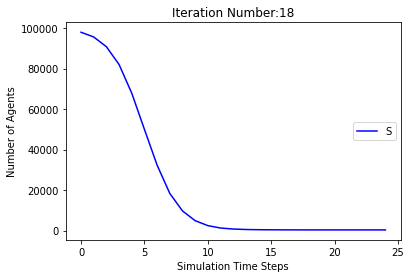

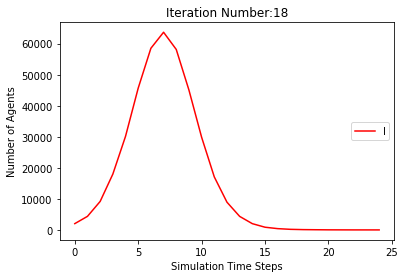

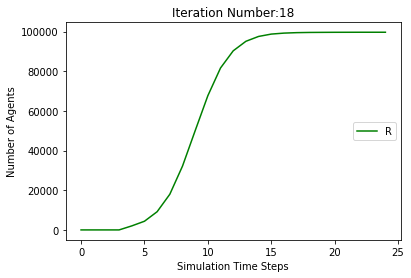

[97975, 95670, 90866, 82080, 68355, 51207, 34348, 20789, 12009, 6671, 3612, 1980, 1158, 793, 617, 543, 511, 498, 494, 492, 491, 490, 489, 489, 488, 488, 487, 487, 487, 487, 487]
[2025, 4330, 9134, 17920, 29620, 44463, 56518, 61291, 56346, 44536, 30736, 18809, 10851, 5878, 2995, 1437, 647, 295, 123, 51, 20, 8, 5, 3, 3, 2, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 2025, 4330, 9134, 17920, 31645, 48793, 65652, 79211, 87991, 93329, 96388, 98020, 98842, 99207, 99383, 99457, 99489, 99502, 99506, 99508, 99509, 99510, 99511, 99511, 99512, 99512, 99513]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089,

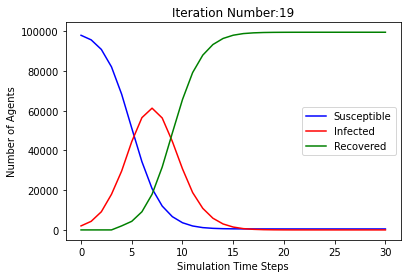

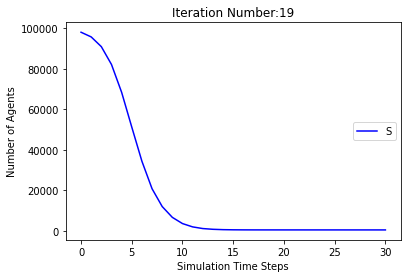

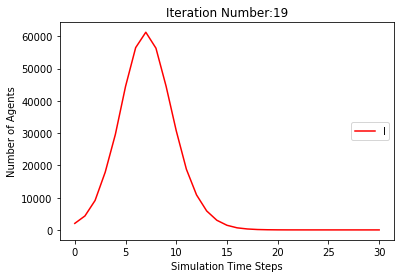

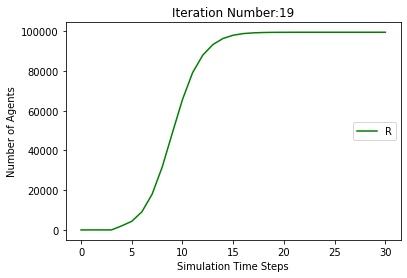

[97975, 95708, 91117, 82855, 69734, 53536, 37613, 25084, 16198, 10125, 6235, 3837, 2386, 1587, 1139, 902, 785, 722, 690, 676, 666, 661, 658, 658, 657, 657, 657, 657, 657]
[2025, 4292, 8883, 17145, 28241, 42172, 53504, 57771, 53536, 43411, 31378, 21247, 13812, 8538, 5096, 2935, 1601, 865, 449, 226, 119, 61, 32, 18, 9, 4, 1, 1, 0]
[0, 0, 0, 0, 2025, 4292, 8883, 17145, 30266, 46464, 62387, 74916, 83802, 89875, 93765, 96163, 97614, 98413, 98861, 99098, 99215, 99278, 99310, 99324, 99334, 99339, 99342, 99342, 99343]
[[], [97975, 95656, 90921, 82207, 68241, 50831, 33536, 19822, 11035, 5966, 3253, 1893, 1193, 881, 729, 629, 583, 555, 540, 532, 524, 519, 518, 517, 516, 516, 515, 514, 514, 514, 514, 514], [97975, 95591, 90782, 81925, 68219, 51160, 34439, 21149, 12138, 6776, 3787, 2241, 1424, 1008, 802, 696, 633, 603, 585, 582, 577, 576, 573, 573, 572, 572, 572, 572, 571, 571, 571, 570, 570, 570, 570, 570], [97975, 95626, 91001, 82254, 68031, 50683, 33179, 19022, 10074, 5089, 2498, 1315, 812, 595

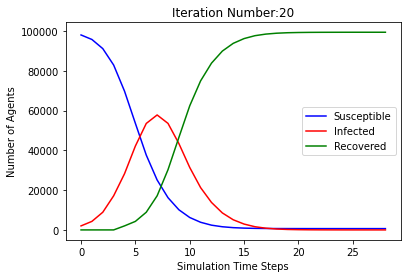

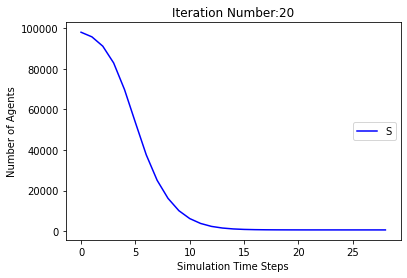

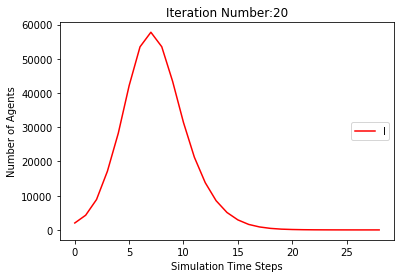

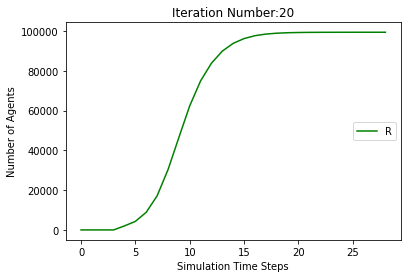

In [ ]:
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(100):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

In [ ]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  


  
